In [80]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
# %matplotlib inline
sns.set()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

color_list = sns.color_palette()

### Airbus

In [81]:
# airbus_df = pd.read_csv('./airbus.csv') # seed 0 ep 349
# airbus_df.drop(columns=['dim of z2 private', "dim of z1 private", "dim of z1 share"], inplace=True)
# ### drop method = No DPCA module
# idx = airbus_df[(airbus_df['method'] == 'No DPCA module')].index
# airbus_df.drop(idx, inplace=True)
# airbus_df.replace("NDPCA (ours)", "NDPCA (2 sources)", inplace=True)
# print(airbus_df.head())


airbus_df4 = pd.read_csv('./airbus4.csv') # seed 0 ep 349
airbus_df4.rename(columns={"dim of z1 private": "$Z_1$", "dim of z2 private": "$Z_2$", "dim of z3 private": "$Z_3$", "dim of z4 private": "$Z_4$"}, inplace=True)
airbus_df = airbus_df4.drop(columns=['$Z_1$', '$Z_2$', '$Z_3$', '$Z_4$'], inplace=False)

# airbus_df = pd.concat([airbus_df, _])
print(airbus_df.head())
print(airbus_df.tail())

   dpca_dim   testmAP  seed             method
0         4  0.174413     2  NDPCA (4 sources)
1         8  0.463535     2  NDPCA (4 sources)
2        12  0.644272     2  NDPCA (4 sources)
3        16  0.716996     2  NDPCA (4 sources)
4        20  0.727203     2  NDPCA (4 sources)
    dpca_dim   testmAP  seed             method
15        24  0.773609    10  NDPCA (4 sources)
16        28  0.773090    10  NDPCA (4 sources)
17        32  0.774704    10  NDPCA (4 sources)
18        36  0.772230    10  NDPCA (4 sources)
19        40  0.771302    10  NDPCA (4 sources)


In [82]:
AE_Zs = [4, 12, 20, 40]
DAE_map = [0.08, 0.60, 0.72, 0.73]

for z_ind, z in enumerate(AE_Zs):
    airbus_df = airbus_df.append({'dpca_dim': z, 'Z1': z, 'Z2': 0 , 'Z3': 0, 'Z4': 0,'testmAP': DAE_map[z_ind],
                                    'method': 'DAE (4 sources)', 'seed': 0}, ignore_index=True)


### Plots

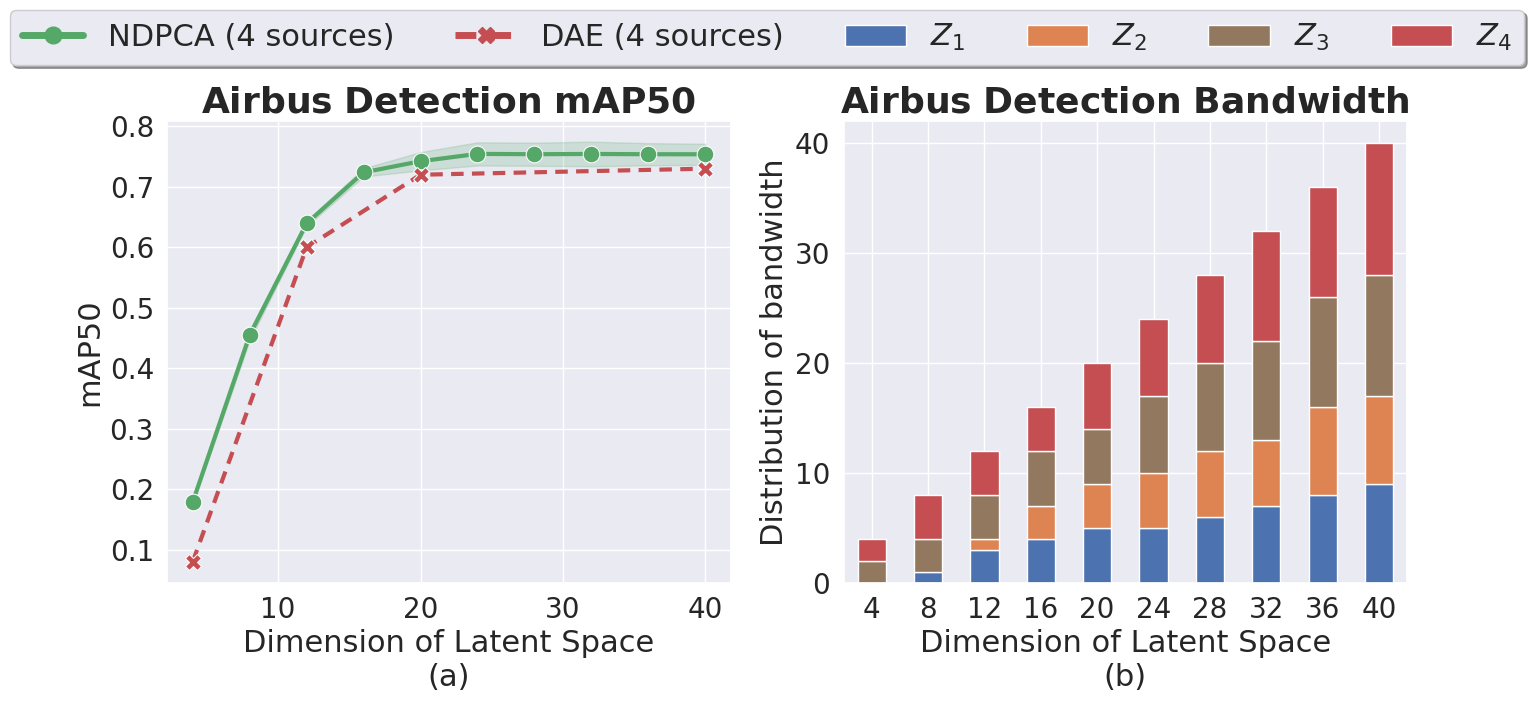

In [83]:
fig, ax_list = plt.subplot_mosaic([["airbus_dpca", "airbus_z"]], figsize=(16, 6))

xylabelsize = 22
titlesize = 26
legendsize = 22
ticksize = 20

plot1_xlabel = "Dimension of Latent Space"
plot1_ylabel = "Distribution of bandwidth"

### set title
ax_list["airbus_dpca"].set_title(r"$\bf{Airbus~Detection~mAP50}$", fontsize=titlesize)
ax_list["airbus_z"].set_title(r"$\bf{Airbus~Detection~Bandwidth}$", fontsize=titlesize)

### Plot AirBus Detection
## plot DPCA curve
ax3 = sns.lineplot(data=airbus_df, x="dpca_dim", y="testmAP", ax=ax_list["airbus_dpca"], linewidth=3, hue='method', style="method",
                    palette=[color_list[2], color_list[3]], dashes=['', (3,2)], markers=True, markersize=12)
ax_list["airbus_dpca"].set_xlabel("Dimension of Latent Space"+'\n(a)', fontsize=xylabelsize)
ax_list["airbus_dpca"].set_ylabel("mAP50", fontsize=xylabelsize)
ax_list["airbus_dpca"].tick_params(axis="x", labelsize=ticksize)
ax_list["airbus_dpca"].tick_params(axis="y", labelsize=ticksize)
leg = ax_list["airbus_dpca"].legend()
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax_list["airbus_dpca"].legend().remove()

## plot Z1 ~ Z4
airbus_df_z = airbus_df4.loc[(airbus_df4["method"]).str.contains('4') & (airbus_df4["seed"] == 10) ]
airbus_df_z.plot(kind='bar', stacked=True, color=[color_list[0], color_list[1], color_list[5], color_list[3]], ax=ax_list["airbus_z"],
                x="dpca_dim", y=["$Z_1$", "$Z_2$", "$Z_3$", "$Z_4$"], width=0.5, rot=0)
# ax_list["airbus_z"].plot([-0.5, 9.5], [1.25, 26.25], color='black', linestyle='dashed', linewidth=3)
ax_list["airbus_z"].set_xlabel(plot1_xlabel+'\n(b)', fontsize=xylabelsize)
ax_list["airbus_z"].set_ylabel(plot1_ylabel, fontsize=xylabelsize)
ax_list["airbus_z"].tick_params(axis="x", labelsize=ticksize)
ax_list["airbus_z"].tick_params(axis="y", labelsize=ticksize)
ax_list["airbus_z"].legend().remove()

### Generate a legend for the first line only
lines_labels = [ax.get_legend_handles_labels() for ax in [ax_list["airbus_dpca"], ax_list["airbus_z"]]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

lgd = fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.09), fancybox=True, shadow=True, ncol=6, fontsize=22, markerscale=2)
for line in lgd.get_lines():
    line.set_linewidth(5.0)
plt.show()
fig.savefig('./airbus_4_sources_results.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')